In [3]:
#look to my coming, at first light, on the fifth day. at dawn,look to the east.
#kalk appiah kalk allah'ın dediği olur
#grazie mille ragazzi
#kekw

In [4]:
#necessary libraries

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [28]:
import pandas as pd

In [29]:
#in the dataset, there are 25k images. however we dont need to have that kinda images.
#so firstly, in the catDogDataset, we need train/cat(dog) files.
#for the train, 1000 cat and 1000 dog images added
#for the validation, 200 cat and 200 dog images added
#for the test, 100 cat and 100 dog images added


In [6]:
os.chdir(r'C:\Users\cagatayy\deepLearningApplication\catDogDataset')

if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat');
    os.makedirs('test/dog')
    os.makedirs('test/cat')

In [7]:
#    
    
    for i in random.sample(glob.glob('cat*'), 1000):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 1000):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 200):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 200):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'test/dog')

In [30]:
train_path = r'C:\Users\cagatayy\deepLearningApplication\catDogDataset\train'
valid_path = r'C:\Users\cagatayy\deepLearningApplication\catDogDataset\valid'
test_path  = r'C:\Users\cagatayy\deepLearningApplication\catDogDataset\test'

In [31]:
#training, validation, and test data are stored in directoryIterator
#to create the training, validation, and test data we use ImageDataGenerator.flow_from_directory()
#preprocessing = keras.vgg16
#classes cat and dog -> gooeesss 2 output layer brrrrrrrrrrrrr
#target size helps us to resize
#to further explanations, in the next cell all the properties copied.

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [10]:
"""
    tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs
)
"""

'\n    tf.keras.preprocessing.image_dataset_from_directory(\n    directory,\n    labels="inferred",\n    label_mode="int",\n    class_names=None,\n    color_mode="rgb",\n    batch_size=32,\n    image_size=(256, 256),\n    shuffle=True,\n    seed=None,\n    validation_split=None,\n    subset=None,\n    interpolation="bilinear",\n    follow_links=False,\n    crop_to_aspect_ratio=False,\n    **kwargs\n)\n'

In [11]:
##vizualization

In [32]:
assert train_batches.n == 2000
assert valid_batches.n == 400
assert test_batches.n  == 200
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [33]:
#10 images along with 10 corresponding labels because of the batch size == 10
imgs, labels = next(train_batches)


In [34]:
#this function helps us to plot the images from the train batches
#plus this function is in the tensorflow, it's just copy paste (:
#please don't shame me....
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

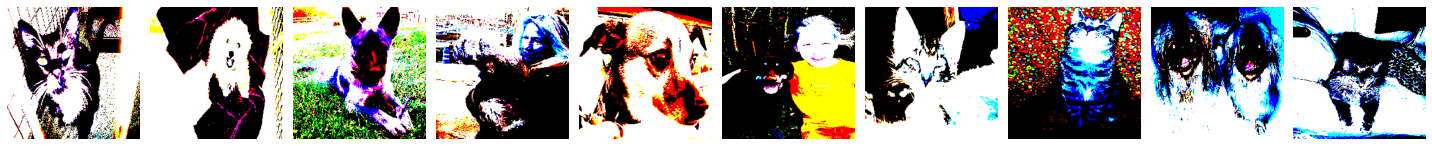

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [35]:
plotImages(imgs)
print(labels)

#as you can see the images looks like distorted? it's quite normal because 
#vgg16's process style. nothing is weird for now (:
#then, in the below, one hot encoding represents cat or dog.
#first column corresponds cat, second column corresponds dog. 
#[1,0] = cat, [0,1] = dog,
#this is much more proper way to show than label encoder.

In [16]:
#Creating and trainig a CNN 

In [17]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3), name= "Conv2D-one-layer"),
    MaxPool2D(pool_size=(2, 2), strides=2, name= "MaxPool2D-one-layer"),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', name= "Conv2D-two-layer"),
    MaxPool2D(pool_size=(2, 2), strides=2, name= "MaxPool2D-two-layer"),
    Flatten(name="Flatten1-layer"),
    Dense(units=2, activation='softmax', name= "Output-layer")
])

#padding = "same" refers to zero padding
#MaxPool2D basicly divide size into 2 
#with Flatten(), the array collapsing into one dimention (56*56*64 (MaxPool2D-two)= 200704 (Flatten()))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-one-layer (Conv2D)    (None, 224, 224, 32)      896       
_________________________________________________________________
MaxPool2D-one-layer (MaxPool (None, 112, 112, 32)      0         
_________________________________________________________________
Conv2D-two-layer (Conv2D)    (None, 112, 112, 64)      18496     
_________________________________________________________________
MaxPool2D-two-layer (MaxPool (None, 56, 56, 64)        0         
_________________________________________________________________
Flatten1-layer (Flatten)     (None, 200704)            0         
_________________________________________________________________
Output-layer (Dense)         (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [21]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=["accuracy"])

#setting the hyperparameters

In [23]:
model.fit(
    x=train_batches,
    validation_data=valid_batches,
    epochs=10,
    verbose=2
)

Epoch 1/10
200/200 - 48s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.6731 - val_accuracy: 0.6225
Epoch 2/10
200/200 - 49s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.6923 - val_accuracy: 0.6275
Epoch 3/10
200/200 - 45s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.7122 - val_accuracy: 0.6275
Epoch 4/10
200/200 - 49s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7335 - val_accuracy: 0.6250
Epoch 5/10
200/200 - 47s - loss: 9.8666e-04 - accuracy: 1.0000 - val_loss: 1.7511 - val_accuracy: 0.6250
Epoch 6/10
200/200 - 49s - loss: 8.2705e-04 - accuracy: 1.0000 - val_loss: 1.7766 - val_accuracy: 0.6300
Epoch 7/10
200/200 - 46s - loss: 7.0507e-04 - accuracy: 1.0000 - val_loss: 1.7920 - val_accuracy: 0.6275
Epoch 8/10
200/200 - 48s - loss: 5.9655e-04 - accuracy: 1.0000 - val_loss: 1.8082 - val_accuracy: 0.6300
Epoch 9/10
200/200 - 49s - loss: 5.1153e-04 - accuracy: 1.0000 - val_loss: 1.8279 - val_accuracy: 0.6250
Epoch 10/10
200/200 - 50s - loss: 4.4076e-04 - accuracy: 1.0000 - val_l

In [24]:
#predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

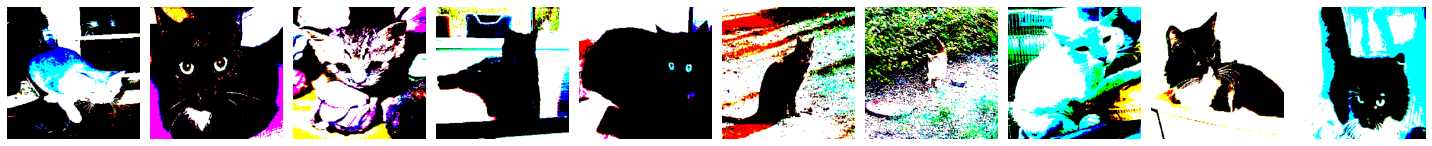

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [25]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [26]:
test_batches.classes

#Shuffling affects learning, but during testing or validation, you are not learning.
#So, it should not make any difference whether you shuffle or not the test or validation data
#(unless you are computing some metric that depends on the order of the samples), given that 
#you will not be computing any gradient, but just the loss or some metric/measure like the accuracy,
#which is not sensitive to the order or the samples you use to compute it.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [27]:
predictions = model.predict(x = test_batches, verbose = 0)

#prediction syntax: model.predict (x(your test batch), verbose = 0)

In [28]:
np.round(predictions)

#you need to round your predictions to 1.

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [29]:
cm = confusion_matrix(
    y_true=test_batches.classes,
    y_pred=np.argmax(predictions,
    axis=-1)
)

#your confusion matrix will require labeled test value
#(in this process, labeled data is test_batches.classes(follow the pipeline))
#then your predicted test values BUT first you need to do argmax process
#what is argmax?
#argmax aradığınız axisteki en büyük değerin indisini bastırır. 
#axix 0 = sütun sütun bakar, 1 satır satır bakar
#(arr,1) = 1 mi 2 mi? 2 büyük 1 numaralı indis basar
#31 mi 4 mü büyük? 31 bütük 0 numaralı indis basar
#(arr,0)'da 1,31,5,6 arasında 31 byük 1 numaralı indisi basar
#2,4,6,8 de 8 büyük o yüzden 3 numaralı indis basılacak. 

In [52]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap,)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#bu kod parçası conf matrix için sklearn'ün open source olarak sitesinde paylaştığı
#kod parçası. conf matrix için bu kod kullanılabilir.

In [31]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [32]:
cm_plot_labels = ["cat","dog"]
#fonksiyondaki cm_plot_labels yani classların ismini giriyorsun

Confusion matrix, without normalization
[[76 24]
 [35 65]]


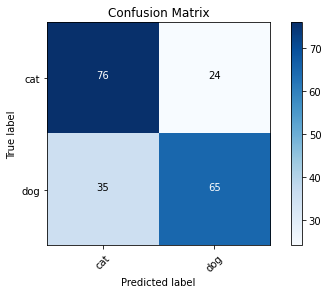

In [33]:
plot_confusion_matrix (cm, cm_plot_labels, title = "Confusion Matrix" )

#function is called aaaaand TA DAAAA

In [34]:
#building fine-tuned vgg16 model

In [35]:
#in order to use the vgg16 model, first, we need to download 

"""
vgg16_model = tf.keras.applications.vgg16.VGG16()

"""



553467904/553467096 [==============================] - 260s 0us/step


In [37]:
#as you can see the summary, THIS ARCHITECTURE IS NUTSSS!
#this arch can classify 1000 features, but we need only 2.


vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [40]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

#to have only 2 node output layer, we define a new sequential.
#in vgg model, we add 19 out of 20 layer added (only output is left out)

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [42]:
for layer in model.layers:
    layer.trainable = False
    
#we stopped learning of the arch. (this is what's fine tuning.)

In [44]:
model.add(Dense(units = 2, activation = "softmax", name = "output-layer"))

#now we're adding learnable, fresh output layer. this layer contains only 
#2 output node. that's nice. and of course actv. layer is softmax because 
#the loss function is cross entropy. if your class is more than 2 you need
#to use these to. binary entropy + sigmoid actv. function is same strength
#to cross ent + softmax. the preferable choice is cross ent + softmax imo.

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [46]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=["accuracy"])

In [47]:
model.fit(
    x=train_batches,
    validation_data=valid_batches,
    epochs=10,
    verbose=2
)

Epoch 1/10
200/200 - 478s - loss: 0.1593 - accuracy: 0.9395 - val_loss: 0.0848 - val_accuracy: 0.9725
Epoch 2/10
200/200 - 481s - loss: 0.0557 - accuracy: 0.9800 - val_loss: 0.0799 - val_accuracy: 0.9725
Epoch 3/10
200/200 - 470s - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0727 - val_accuracy: 0.9775
Epoch 4/10
200/200 - 502s - loss: 0.0288 - accuracy: 0.9930 - val_loss: 0.0678 - val_accuracy: 0.9825
Epoch 5/10
200/200 - 480s - loss: 0.0223 - accuracy: 0.9960 - val_loss: 0.0659 - val_accuracy: 0.9825
Epoch 6/10
200/200 - 491s - loss: 0.0181 - accuracy: 0.9975 - val_loss: 0.0642 - val_accuracy: 0.9850
Epoch 7/10
200/200 - 471s - loss: 0.0141 - accuracy: 0.9985 - val_loss: 0.0722 - val_accuracy: 0.9825
Epoch 8/10
200/200 - 481s - loss: 0.0121 - accuracy: 0.9985 - val_loss: 0.0682 - val_accuracy: 0.9800
Epoch 9/10
200/200 - 482s - loss: 0.0097 - accuracy: 0.9995 - val_loss: 0.0695 - val_accuracy: 0.9800
Epoch 10/10
200/200 - 470s - loss: 0.0078 - accuracy: 0.9995 - val_loss: 0.0680 - 

In [48]:
#predicting images in vgg16 trained model

In [26]:
predictions =  model.predict(x = test_batches, verbose = 0)

NameError: name 'test_batches' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

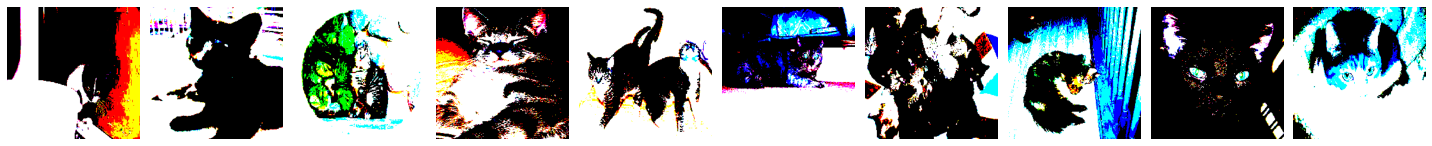

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [57]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [58]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [59]:
cm = confusion_matrix(
    y_true=test_batches.classes,
    y_pred=np.argmax(predictions,
    axis=-1)
)

In [60]:
cm_plot_labels = ["cat","dog"]

Confusion matrix, without normalization
[[100   0]
 [  6  94]]


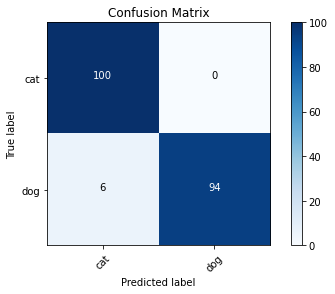

In [61]:
plot_confusion_matrix (cm, cm_plot_labels, title = "Confusion Matrix" )

In [36]:
#mobilenet

In [37]:
mobilenet_model = tf.keras.applications.mobilenet.MobileNet()

In [38]:
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [39]:
model = Sequential()
for layer in mobilenet_model.layers[:-1]:
    model.add(layer)


In [40]:
for layer in model.layers:
    layer.trainable = False

In [41]:
model = Sequential()
for layer in mobilenet_model.layers[:-1]:
    model.add(layer)

In [42]:
model.add(Dense(units = 2, activation = "softmax", name = "output-layer"))

In [43]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)     

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=["accuracy"])

In [46]:
model.fit(
    x=train_batches,
    validation_data=valid_batches,
    epochs=25,
    verbose=2
)

Epoch 1/25
200/200 - 39s - loss: 0.3142 - accuracy: 0.8605 - val_loss: 0.3589 - val_accuracy: 0.8425
Epoch 2/25
200/200 - 38s - loss: 0.3108 - accuracy: 0.8720 - val_loss: 0.3608 - val_accuracy: 0.8400
Epoch 3/25
200/200 - 38s - loss: 0.3006 - accuracy: 0.8750 - val_loss: 0.3608 - val_accuracy: 0.8425
Epoch 4/25
200/200 - 38s - loss: 0.2960 - accuracy: 0.8795 - val_loss: 0.3608 - val_accuracy: 0.8350
Epoch 5/25
200/200 - 37s - loss: 0.2885 - accuracy: 0.8740 - val_loss: 0.3487 - val_accuracy: 0.8500
Epoch 6/25
200/200 - 39s - loss: 0.2834 - accuracy: 0.8800 - val_loss: 0.3800 - val_accuracy: 0.8250
Epoch 7/25
200/200 - 39s - loss: 0.2764 - accuracy: 0.8815 - val_loss: 0.3452 - val_accuracy: 0.8575
Epoch 8/25
200/200 - 38s - loss: 0.2706 - accuracy: 0.8865 - val_loss: 0.3530 - val_accuracy: 0.8500
Epoch 9/25
200/200 - 39s - loss: 0.2664 - accuracy: 0.8870 - val_loss: 0.3450 - val_accuracy: 0.8550
Epoch 10/25
200/200 - 38s - loss: 0.2623 - accuracy: 0.8910 - val_loss: 0.3441 - val_accura

In [47]:
predictions =  model.predict(x = test_batches, verbose = 0)

In [48]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [49]:
cm = confusion_matrix(
    y_true=test_batches.classes,
    y_pred=np.argmax(predictions,
    axis=-1)
)

In [50]:
cm_plot_labels = ["cat","dog"]

Confusion matrix, without normalization
[[85 15]
 [16 84]]


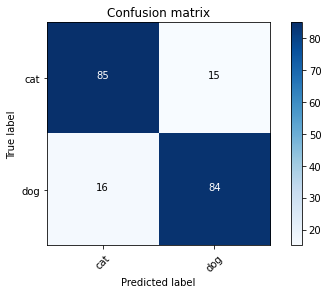

In [53]:
plot_confusion_matrix (cm, cm_plot_labels)